# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics


/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.metrics.NPLM import candidate_sigma
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-11-28 15:23:03.482618: Importing os...
2024-11-28 15:23:03.482782: Importing sys...
Visible devices: [0]
2024-11-28 15:23:03.483015: Importing timer from timeit...
2024-11-28 15:23:03.483083: Setting env variables for tf import (only device(s) [0] will be available)...
2024-11-28 15:23:03.483206: Importing numpy...
2024-11-28 15:23:04.224174: Importing matplotlib...
2024-11-28 15:23:04.845014: Importing h5py...
2024-11-28 15:23:05.094771: Importing importlib.util...
2024-11-28 15:23:05.094921: Importing json...
2024-11-28 15:23:05.094990: Importing pandas...
2024-11-28 15:23:06.272644: Importing random...
2024-11-28 15:23:06.272808: Importing scipy utils...
2024-11-28 15:23:07.398250: Importing subprocess...
2024-11-28 15:23:07.398394: Importing textwrap...
2024-11-28 15:23:07.398455: Importing tensorflow...
Tensorflow version: 2.16.1
2024-11-28 15:23:19.306761: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-11-28 15:23:21.396384: Importing timeit.

/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-11-28 15:23:39.073344: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2024-11-28 15:23:39.090621: All done.


# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/particle_features_30/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories were created")
else:
    print("Directory alredy exists")

Directory alredy exists


In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 90])

# TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '10K_preprocessed_Test_NPLM_par/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")
    
particle_features_reduced = get_reduced_particle_features(particle_features)

mean = tf.reduce_mean(particle_features_reduced, axis=0)
std = tf.math.reduce_std(particle_features_reduced, axis=0)
    
dataset = preprocess_data(particle_features_reduced, mean, std)

Directory results/particle_features_30/tests/10K_preprocessed_Test_NPLM_par/ already exists


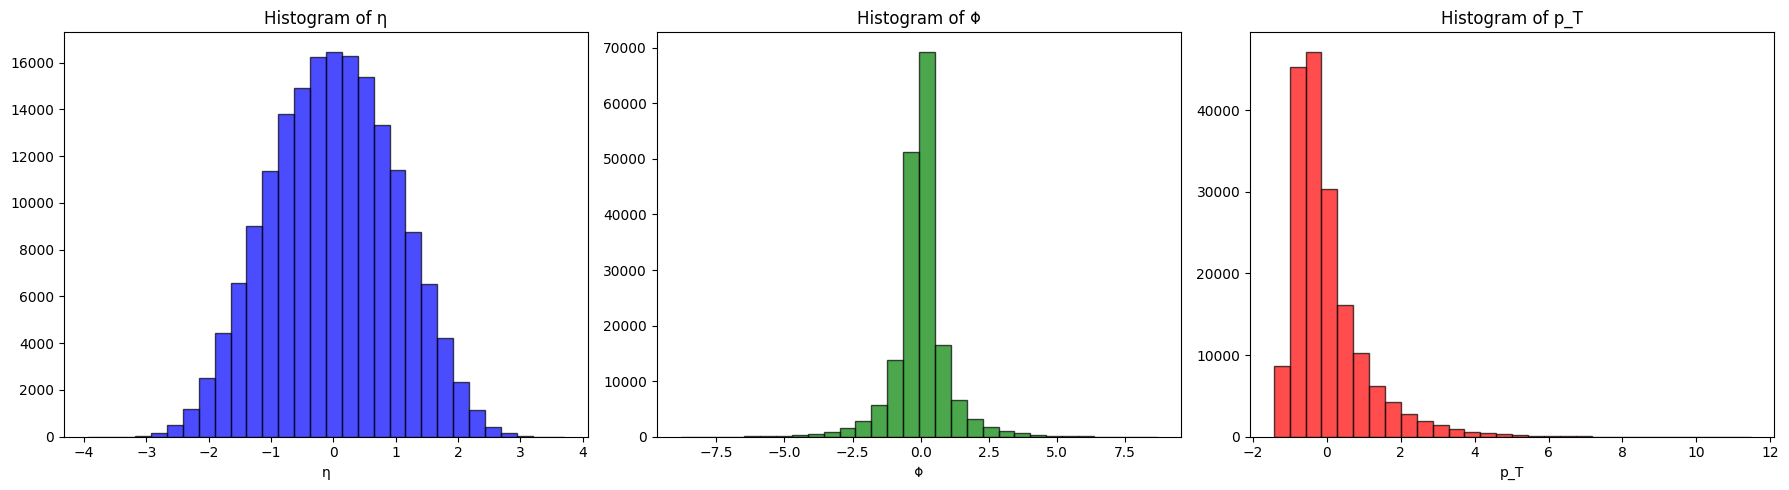

In [9]:
plt.figure(figsize=(18, 5))

# Plotting all histograms in one line
plt.subplot(1, 3, 1)
plt.hist(dataset[:, 0], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of η")
plt.xlabel("η")
plt.ylabel("")

plt.subplot(1, 3, 2)
plt.hist(dataset[:, 1], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title("Histogram of 𐌘")
plt.xlabel("𐌘")
plt.ylabel("")

plt.subplot(1, 3, 3)
plt.hist(dataset[:, 2], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title("Histogram of p_T")
plt.xlabel("p_T")
plt.ylabel("")

plt.tight_layout()
plt.show()


## Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")    
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

Directory results/particle_features_30/tests/10K_preprocessed_Test_NPLM_par/null_hypotheses/ already exists


In [10]:
niter_tot = 24
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
flk_sigma = candidate_sigma(dist_1_null, perc = 90)

niter: 8, nbootstrap: 3
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 18.2


In [ ]:
# test_config_null = {}
# test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
# keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
# for key in keys_to_remove:
#     test_config_tmp.pop(key, None)
# for key, value in test_config_tmp.items():
#     new_key = key.lstrip('_')
    
#     if isinstance(value, tf.Tensor):
#         new_value = value.numpy() # type: ignore
#     elif isinstance(value, np.ndarray):
#         new_value = value.tolist()
#     elif isinstance(value, np.generic):
#         new_value = value.item() # Convert NumPy scalars to Python scalars
#     elif isinstance(value, tf.DType):
#         new_value = value.name
#     elif isinstance(value, np.dtype):
#         new_value = np.dtype(value).name
#     else:
#         new_value = value
    
#     test_config_null[new_key] = new_value

# pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,8,10000,1000,10000000,float64,0,True,False,None,True,False,90,80000,False,90,80000,float64,90,80000,True


In [ ]:
# unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
# metrics_config = {unique_key: {"NPLM": {"name": "nplm",
#                                        "object_name": "NPLMMetric",
#                                        "class_name": "GMetrics.NPLMMetric",
#                                        "kwargs": {"M": 1000,
#                                                   "lam": 1e-6,
#                                                   "iter_list": 1000000,
#                                                   "flk_sigma" : flk_sigma,
#                                                   "weight" : 1},
#                                        "result_key": "metric_list", 
#                                        "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
#                                        "scale_func_string": "lambda ns, ndims: 1",
#                                        "test_config": test_config_null,
#                                        "max_vectorize": 1000, # optimized for 5D
#                                        "latex": "$t_{\mathrm{NPLM}}$",
#                                        "null_file": null_hypotheses_dir + "NPLM.json"}}}

# print(metrics_config[unique_key])
# nplm_config = metrics_config[unique_key]["NPLM"]
# print(nplm_config)

{'NPLM': {'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 1000, 'lam': 1e-06, 'iter_list': 1000000, 'flk_sigma': 18.2, 'weight': 1}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7f4a55a771a0>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 8, 'batch_size_test': 10000, 'batch_size_gen': 1000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': True, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': False, 'ndims_1': 90, 'nsamples_1': 80000, 'is_symb_2': False, 'ndims_2': 90, 'nsamples_2': 80000, 'dtype': 'float64', 'ndims': 90, 'nsamples': 80000, 'small_sample': True}, 'max_vectorize': 1000, 'latex': '$t_{\\mathrm{NPLM}}$', 'null_file': 'results/particle_features_30/tests/10K_preprocessed_Test_NPLM_par/null_hypotheses/NPLM.json'}}
{'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 1000, 'lam':

In [11]:
lam_list = [1e-6, 5e-7, 1e-7, 5e-8, 1e-8, 5e-9, 1e-9]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(
        TwoSampleTestInputsNull,
        progress_bar = True,
        verbose = True,
        M = 1000, 
        lam = lam, 
        flk_sigma = flk_sigma,
        iter_list = 1000000,
        weight = 1
    )
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")
    
print(nplm_objects)

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 5e-07
lam value for NPLMMetric_2 is: 1e-07
lam value for NPLMMetric_3 is: 5e-08
lam value for NPLMMetric_4 is: 1e-08
lam value for NPLMMetric_5 is: 5e-09
lam value for NPLMMetric_6 is: 1e-09
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fe196751990>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fe1964ecd90>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fe1967756d0>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fe196782150>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fe196783e90>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fe196782c10>, 'NPLMMetric_6': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7fe196799190>}


## Lambda Timings

In [12]:
test_names = ["test0", "test1", "test2", "test3"]
name = "nplm"
null_hp_times = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"lambda_times_{test_name}.json"
    
    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        lam_list = [entry["lambda"] for entry in results]
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        
        for i in range(len(lam_list)):
            print(f"For test '{test_name}' and lambda = {lam_list[i]}, the null hypothesis for {niter_tot} points has been calculated in {null_hp_times[test_name][i]} s.")
    else:
        results = []
        null_hp_times[test_name] = np.zeros(len(lam_list))  

        for i in range(len(lam_list)):
            start = timer()
            print(f"Testing NPLMMetric_{i}, lambda value is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")
            print(f"Computing and saving {test_name}")
            print("\n===========================================================")
            print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()

            for j in range(1, nbootstrap):
                l = len(dataset) // 2
                dstmp = shuffle_dataset(seed=1000 * j + j)
                dist_1_null = tf.cast(dstmp[:l], tf.float64)
                dist_2_null = tf.cast(dstmp[l:], tf.float64)
                TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter * batch_size_test]
                TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter * batch_size_test]
                print("\n===========================================================")
                print(f"Testing from {j * niter} to {(j + 1) * niter} of {niter * nbootstrap} samples.")
                nplm_objects[f"NPLMMetric_{i}"].Test_np()
                del dstmp

            end = timer()
            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  # Save the time for this lambda
            results.append({"lambda": lam_list[i], "computing_time": null_hp_times[test_name][i]})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/particle_features_30/tests/10K_preprocessed_Test_NPLM_par/null_hypotheses/lambda_times_test0.json already exists. Loading existing results for test0...
For test 'test0' and lambda = 1e-06, the null hypothesis for 24 points has been calculated in 6.648678976984229 s.
For test 'test0' and lambda = 5e-07, the null hypothesis for 24 points has been calculated in 7.6993091460026335 s.
For test 'test0' and lambda = 1e-07, the null hypothesis for 24 points has been calculated in 12.277452409005491 s.
For test 'test0' and lambda = 5e-08, the null hypothesis for 24 points has been calculated in 17.132290939975064 s.
For test 'test0' and lambda = 1e-08, the null hypothesis for 24 points has been calculated in 24.205087573005585 s.
For test 'test0' and lambda = 5e-09, the null hypothesis for 24 points has been calculated in 29.968044389999704 s.
For test 'test0' and lambda = 1e-09, the null hypothesis for 24 points has been calculated in 57.72385013400344 s.
File results/particle_fea

[0.27702829 0.32080455 0.51156052 0.71384546 1.00854532 1.24866852
 2.40516042]
[0.33353193 0.32285582 0.49405583 0.6005765  1.0021178  1.2719218
 2.24286169]
[0.27229428 0.32256146 0.49255351 0.60156932 0.99919422 1.27092285
 2.26897231]
[0.27077735 0.32172946 0.49308789 0.60389567 1.01873344 1.307844
 2.27169114]


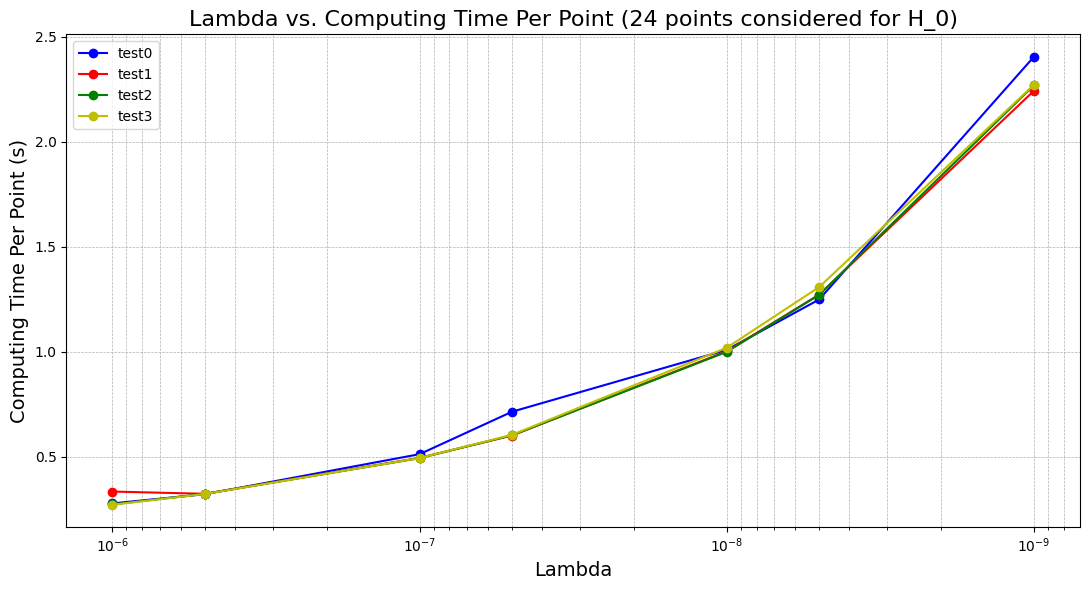

[0.28840796 0.32198782 0.49781444 0.62997173 1.0071477  1.27483929
 2.29717139]


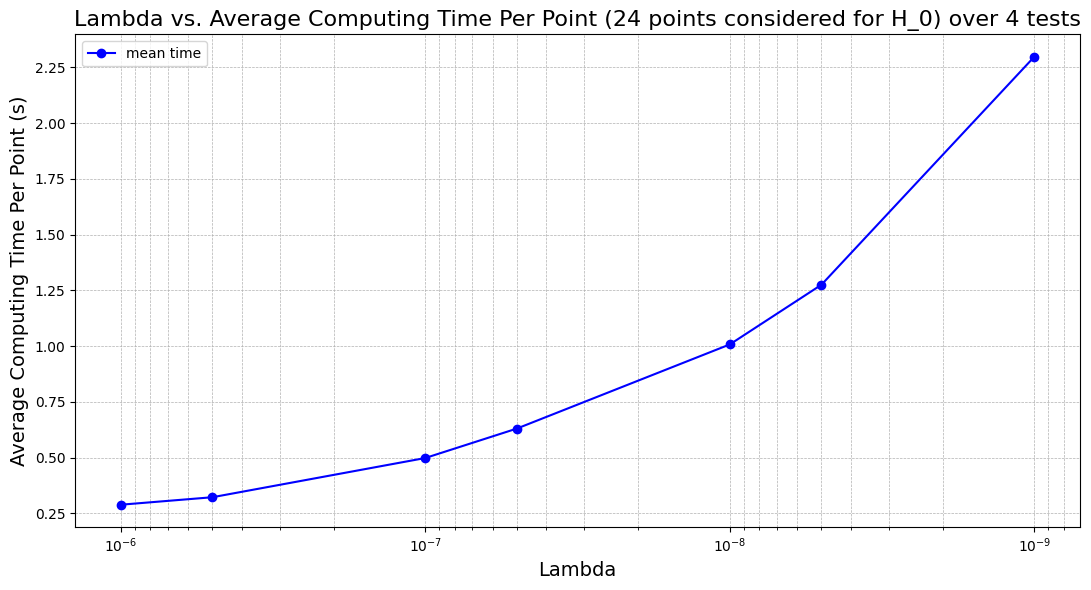

In [ ]:
null_hp_times_per_point = {}
color_list = ['b', 'r', 'g', 'y']
label_list = ['test0', 'test1', 'test2', 'test3']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter_tot
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(lam_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Computing Time Per Point ({niter_tot} points considered for H_0)", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.show()



mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
print(mean_time_per_point)

plt.figure(figsize=(11, 6))
plt.plot(lam_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Average Computing Time Per Point ({niter_tot} points considered for H_0) over 4 tests", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.show()

#test for different sample sizes, add test statistic values, try to test higher M values 

## Nyström centers Timings

In [11]:
M_list = [1000, 1500, 2000, 2500, 3000]

nplm_objects_for_M = {}

for i, M_value in enumerate(M_list):
    nplm_objects_for_M[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                            progress_bar = True,
                                            verbose = True,
                                            M = M_value, 
                                            lam = 1e-9, 
                                            iter_list = 1000000,
                                            flk_sigma = flk_sigma,
                                            weight = 1)
    print(f"M value for NPLMMetric_{i} is: {nplm_objects_for_M[f'NPLMMetric_{i}'].nplm_kwargs.get('M')}")

print(nplm_objects_for_M)
    

M value for NPLMMetric_0 is: 1000
M value for NPLMMetric_1 is: 1500
M value for NPLMMetric_2 is: 2000
M value for NPLMMetric_3 is: 2500
M value for NPLMMetric_4 is: 3000
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f8298f27a10>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f8298ef3110>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f8298ef3dd0>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f8298def890>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f8298ef4890>}


In [13]:
test_names = ["test0", "test1", "test2", "test3"]
name = "nplm"
null_hp_times = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"M_times_{test_name}.json"
    
    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        M_list = [entry["M"] for entry in results]
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        
        for i in range(len(M_list)):
            print(f"For test '{test_name}' and M = {M_list[i]}, the null hypothesis for {niter_tot} points has been calculated in {null_hp_times[test_name][i]} s.")
    else:
        results = []
        null_hp_times[test_name] = np.zeros(len(M_list))  

        for i in range(len(M_list)):
            start = timer()
            print(f"Testing NPLMMetric_{i}, M value is: {nplm_objects_for_M[f'NPLMMetric_{i}'].nplm_kwargs.get('M')}")
            print(f"Computing and saving {test_name}")
            print("\n===========================================================")
            print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
            nplm_objects_for_M[f"NPLMMetric_{i}"].Test_np()

            for j in range(1, nbootstrap):
                l = len(dataset) // 2
                dstmp = shuffle_dataset(seed=1000 * j + j)
                dist_1_null = tf.cast(dstmp[:l], tf.float64)
                dist_2_null = tf.cast(dstmp[l:], tf.float64)
                TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter * batch_size_test]
                TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter * batch_size_test]
                print("\n===========================================================")
                print(f"Testing from {j * niter} to {(j + 1) * niter} of {niter * nbootstrap} samples.")
                nplm_objects_for_M[f"NPLMMetric_{i}"].Test_np()
                del dstmp

            end = timer()
            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  # Save the time for this lambda
            results.append({"M": M_list[i], "computing_time": null_hp_times[test_name][i]})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/particle_features_30/tests/10K_preprocessed_Test_NPLM_par/null_hypotheses/M_times_test0.json already exists. Loading existing results for test0...
For test 'test0' and M = 1000, the null hypothesis for 24 points has been calculated in 68.41291763700428 s.
For test 'test0' and M = 1500, the null hypothesis for 24 points has been calculated in 92.65277654799866 s.
For test 'test0' and M = 2000, the null hypothesis for 24 points has been calculated in 124.1642005990143 s.
For test 'test0' and M = 2500, the null hypothesis for 24 points has been calculated in 152.1179885310121 s.
For test 'test0' and M = 3000, the null hypothesis for 24 points has been calculated in 187.02776620301302 s.
File results/particle_features_30/tests/10K_preprocessed_Test_NPLM_par/null_hypotheses/M_times_test1.json already exists. Loading existing results for test1...
For test 'test1' and M = 1000, the null hypothesis for 24 points has been calculated in 65.31994349800516 s.
For test 'test1' and M = 

[2.85053823 3.86053236 5.17350836 6.33824952 7.79282359]
[2.72166431 3.8383686  5.15802894 6.41164804 7.78021691]
[2.68383385 3.89497759 5.16305125 6.39647949 7.8451962 ]
[2.73144772 3.97503471 5.24736434 6.43715168 7.83133609]


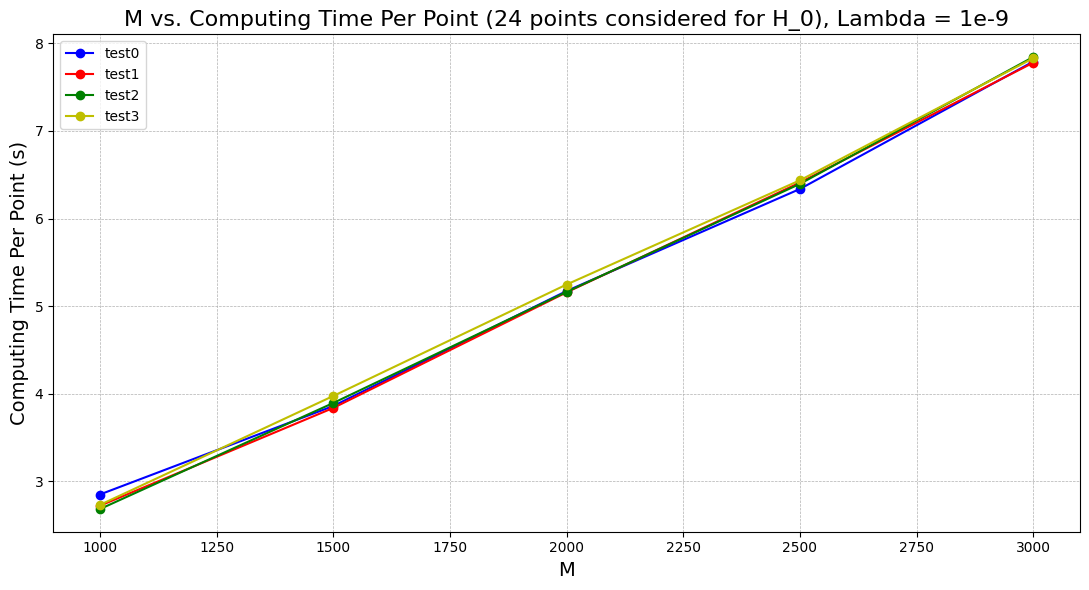

[2.74687103 3.89222832 5.18548822 6.39588218 7.8123932 ]


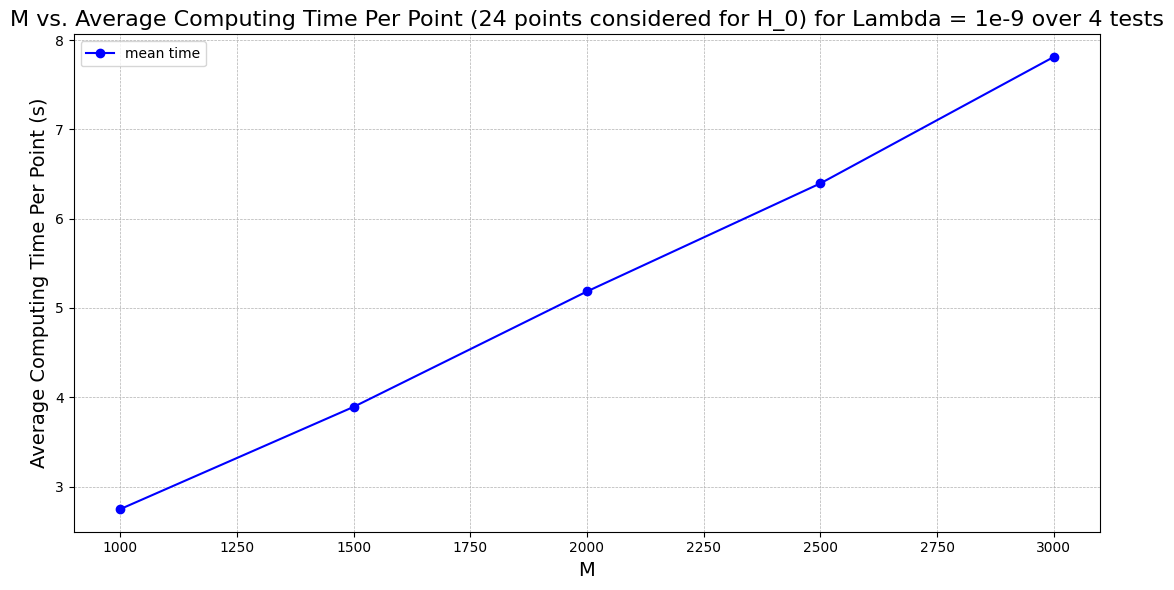

In [15]:
null_hp_times_per_point = {}
color_list = ['b', 'r', 'g', 'y']
label_list = ['test0', 'test1', 'test2', 'test3']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter_tot
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(M_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"M vs. Computing Time Per Point ({niter_tot} points considered for H_0), Lambda = 1e-9", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.show()


mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
print(mean_time_per_point)

plt.figure(figsize=(11, 6))
plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

plt.xlabel("M", fontsize=14)
plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
plt.title(f"M vs. Average Computing Time Per Point ({niter_tot} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.show()


## Alternative hypothesis

### Scan and exclusion limits (bisection method)

In [16]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100, # this will be adapted to the boostrap size
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = os.path.join(model_dir, "exclusion_limits.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [17]:
file_path = os.path.join(model_dir, "exclusion_limits_prova.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [18]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1.
    for bound in bounds:
        try:
            result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == nplm_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
        except:
            result = {}
        if result == {}:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_dataset_np(dataset = dataset,
                                                            metric_config = nplm_config,
                                                            test_kwargs = test_kwargs,
                                                            model_dir = model_dir,
                                                            deformation = deformation,
                                                            seed_dist = 0,
                                                            x_tol = 0.01,
                                                            fn_tol = 0.05,
                                                            bound = bound,
                                                            eps_min = 0.,
                                                            eps_max = eps_max,
                                                            smear = 0.,
                                                            max_iterations = 50,
                                                            save = True,
                                                            filename = "exclusion_limits_prova.json",
                                                            verbose = True)
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]
        else:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
        
print(global_results.keys())

Upper bounds for nplm with mean deformation already loaded.
Central bounds for nplm with mean deformation already loaded.
Lower bounds for nplm with mean deformation already loaded.
Upper bounds for nplm with cov_diag deformation already loaded.
Central bounds for nplm with cov_diag deformation already loaded.
Lower bounds for nplm with cov_diag deformation already loaded.
Upper bounds for nplm with cov_off_diag deformation already loaded.
Central bounds for nplm with cov_off_diag deformation already loaded.
Lower bounds for nplm with cov_off_diag deformation already loaded.
Upper bounds for nplm with power_abs_up deformation already loaded.
Central bounds for nplm with power_abs_up deformation already loaded.
Lower bounds for nplm with power_abs_up deformation already loaded.
Upper bounds for nplm with power_abs_down deformation already loaded.
Central bounds for nplm with power_abs_down deformation already loaded.
Lower bounds for nplm with power_abs_down deformation already loaded.


In [ ]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1.
    for bound in bounds:
        try:
            result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == nplm_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
        except:
            result = {}
        if result == {}:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_dataset_np(dataset = dataset,
                                                            metric_config = nplm_config,
                                                            test_kwargs = test_kwargs,
                                                            model_dir = model_dir,
                                                            deformation = deformation,
                                                            seed_dist = 0,
                                                            x_tol = 0.01,
                                                            fn_tol = 0.05,
                                                            bound = bound,
                                                            eps_min = 0.,
                                                            eps_max = eps_max,
                                                            smear = 0.,
                                                            max_iterations = 50,
                                                            save = True,
                                                            filename = "exclusion_limits.json",
                                                            verbose = True)
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]
        else:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
        
print(global_results.keys())

## Show and save results

In [19]:
import notebooks.shared as shared

In [20]:
results_df, times_df = shared.generate_result_dataframe_nplm(global_results, null_times)

Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm


In [21]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
2,NaN,$0.00327_{-0.00096}^{+0.00096}$,$0.00376_{-0.00085}^{+0.00085}$,$1800$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
0,NaN,$0.01382_{-0.0049}^{+0.0036}$,$0.0159_{-0.0032}^{+0.0036}$,$1489$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,NaN,$0.03157_{-0.011}^{+0.0093}$,$0.03632_{-0.0083}^{+0.0082}$,$1540$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
4,NaN,$0.0389_{-0.018}^{+0.014}$,$0.04754_{-0.011}^{+0.015}$,$1648$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
3,NaN,$0.08444_{-0.018}^{+0.015}$,$0.09304_{-0.015}^{+0.015}$,$2045$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,NaN,$0.15775_{-0.047}^{+0.027}$,$0.17799_{-0.029}^{+0.019}$,$1997$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,NaN,$0.27657_{-0.072}^{+0.041}$,$0.3013_{-0.045}^{+0.044}$,$1914$


### Latex

In [22]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf Scaled Particle features with $\\mathbf{n=m=10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Particle features with $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00327_{-0.00096}^{+0.00096}$ & $0.00376_{-0.00085}^{+0.00085}$ & $1800$ & $0.01382_{-0.0049}^{+0.0036}$ & $0.0159_{-0.0032}^{+0.0036}$ & $1489$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.03157_{-0.011}^{+0.0093}$ & $0.03632_{-0.0083}^{+0.0082}$ & $1540$ & $0.0389_{-0.018}^

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/notebooks/shared.py:544: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [47]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf Scaled Particle features with $\\mathbf{n=m=10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Particle features with $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00341_{-0.0012}^{+0.0011}$ & $0.00398_{-0.0008}^{+0.00099}$ & $5719$ & $0.0132_{-0.0043}^{+0.0039}$ & $0.0158_{-0.0034}^{+0.0034}$ & $4863$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.02919_{-0.014}^{+0.0098}$ & $0.03599_{-0.0083}^{+0.0066}$ & $4605$ & $0.04102_{-0.019}^{+0

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/notebooks/shared.py:544: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [23]:
shared.save_latex(tex_string, model_dir)

LaTeX table code has been written to results/particle_features_30/tests/10K_preprocessed/results_table_prova.tex


In [49]:
import re
      
# Path to the old metrics results table
file_path_other_metrics = "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/JetNetMetrics/results/particle_features_30/tests/10K_preprocessed/results_table.tex"
with open(file_path_other_metrics, 'r') as file:
    table_other_metrics = file.read()

# in the NPLM table isolate the rows with NPLM results and color them in red
nplm_rows = []
lines_nplm = tex_string.splitlines()
for line in lines_nplm:
	if "$t_{\mathrm{NPLM}}$" in line:
		nplm_rows.append("\\rowcolor{red!35}"+line)
	else:
		pass

sw_rows = []
lines_sw = table_other_metrics.splitlines()
for line in lines_sw:
	if "$t_{\mathrm{SW}}$" in line:
		sw_rows.append(line)
	else:
		pass

ks_rows = []
lines_ks = table_other_metrics.splitlines()
for line in lines_ks:
	if "$t_{\overline{\mathrm{KS}}}$" in line:
		ks_rows.append(line)
	else:
		pass

sks_rows = []
lines_sks = table_other_metrics.splitlines()
for line in lines_sks:
	if "$t_{\mathrm{SKS}}$" in line:
		sks_rows.append(line)
	else:
		pass

fgd_rows = []
lines_fgd = table_other_metrics.splitlines()
for line in lines_fgd:
	if "$t_{\mathrm{FGD}}$" in line:
		fgd_rows.append(line)
	else:
		pass

mmd_rows = []
lines_mmd = table_other_metrics.splitlines()
for line in lines_mmd:
	if "$t_{\mathrm{MMD}}$" in line:
		mmd_rows.append(line)
	else:
		pass

lines_old = table_other_metrics.splitlines()
new_lines = []
i = 0  

# add the NPLM results between the MMD and the LLR results in the old metric
for lines in lines_old:
    if "$t_{\\mathrm{SW}}$" in lines:
        new_lines.append(lines)
        new_lines.append(ks_rows[i])
        new_lines.append(sks_rows[i])
        new_lines.append(fgd_rows[i])
        new_lines.append(mmd_rows[i])
        new_lines.append(nplm_rows[i])
        i = (i + 1) % len(nplm_rows)
    elif "$\epsilon^{\\rm   {pow}_{+}}_{99\%\mathrm{CL}}$" in lines:
        new_lines.append("Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\\\")
    elif "$\epsilon^    {\mathcal{N}}_{99\%\mathrm{CL}}$" in lines:
        new_lines.append("Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\\\")
    elif "$\epsilon^    {\mathcal{U}}_{99\%\mathrm{CL}}$" in lines:
        new_lines.append("Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $t^{\mathrm{null}}$ (s) \\\\")
    elif "$t_{\overline{\mathrm{KS}}}$" in lines:
        pass
    elif "$t_{\mathrm{SKS}}$" in lines:
        pass
    elif "$t_{\mathrm{FGD}}$" in lines:
        pass
    elif "$t_{\mathrm{MMD}}$" in lines:
        pass
    elif "$t_{\mathrm{LLR}}$" in lines:
        pass
    else:
        new_lines.append(lines)

updated_table = "\n".join(new_lines)

print(updated_table)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Particle features with $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm    {CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.03001_{-0.012}^{+0.0061}$ & $0.03983_{-0.0068}^{+0.0059}$ & ${\mathbf{636}}$ & $0.03556_{-0.014}^{+0.013}$ & $0.04838_{-0.012}^{+0.01}$ & ${\mathbf{663}}$ \\
	$t_{\overline{\mathrm{KS}}}$ & ${\mathbf{0.01913_{-0.0097}^{+0.0053}}}$ & ${\mathbf{0.02873_{-0.0066}^{+0.0044}}}$ & $772$ & $0.04819_{-0.026}^{+0.016}$ & $0.06797_{-0.016}^{+0.015}$ & $871$ \\
	$t_{\mathrm{SKS}}$ & $0.02745_{-0.011}^{+0.0048}$ & $0.03644_{-0.0062}^{+0.0054}$ & $1583$ & $0.04382_{-0.014}^{+0.021}$ & $0.0658_{-0.016}^{+0.01}$ & $1772$ \\
	$t_{\mathrm{FGD}}$ & $0.03709_{-0.013}^{+0.007

In [50]:
shared.save_update_latex(updated_table, model_dir)

LaTeX table code has been written to results/particle_features_30/tests/10K_preprocessed/results_table_updated.tex
